In [15]:
truthfile = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/data/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055_cn_annotated_maxmin.bb" 
postfile = "/Users/gillianchu/mek/cnaviz/ascat/cnaviz_outputs/s4669_20220110033110.tsv" 
prefile = "/Users/gillianchu/mek/cnaviz/ascat/cnaviz_inputs/s4669_aspcf_cnavizin.txt"

In [16]:
true_colordict = {0: "#d3fe14", 
             1: "#c9080a",
             2: "#fec7f8",
             3: "#0b7b3e",
             4: "#3957ff",
             5: "#0bf0e9",
             6: "#c203c8",
             7: "#fd9b39",
             8: "#906407",
             9: "#98ba7f",
             10: "#fe6794",
             11: "#10b0ff",
             12: "#ac7bff", 
             13: "#fee7c0",
             14: "#964c63",
             15: "#1da49c",
             16: "#0ad811",
             17: "#bbd9fd",
             18: "#fe6cfe",
             19: "#d1a09c",
             20: "#78579e",
             21: "#81ffad"
            }
edited_colordict = {0: '#fec7f8', #"#d3fe14", 
             2: "#fec7f8",
             3: "#0b7b3e",
             4: "#ff8a65",
             5: "#0bf0e9",
             6: "#c203c8",
             7: "#fd9b39",
             13: "#fee7c0",
             15: "#1da49c",
             17: "#bbd9fd",
             18: "#fe6cfe",
             20: "#78579e",
             27: "#c203c8",
             36: "#d4ccd1",
             41: "#d8bb7d",
             57: "#d24dfe",
             62: "#646b8c",
             65: "#c4d5b5",
             66: "#fdc4bd",
             67: "#1cae05",
             68: "#7bd972"
            }
inferred_colordict = {0: "#d3fe14", 
             1: "#c9080a",
             2: "#fec7f8",
             3: "#0b7b3e",
             4: "#3957ff",
             5: "#0bf0e9",
             6: "#c203c8",
             7: "#fd9b39",
             8: "#906407",
             9: "#98ba7f",
             10: "#fe6794",
             11: "#10b0ff",
             12: "#ac7bff", 
             13: "#fee7c0",
             14: "#964c63",
             15: "#1da49c",
             16: "#0ad811",
             17: "#bbd9fd",
             18: "#fe6cfe",
             19: "#d1a09c",
             20: "#78579e",
             21: "#81ffad",
             22: "#739400",
             23: "#ca6949",
             24: "#d9bf01",
             25: "#646a58",
             26: "#d5097e",
             27: "#bb73a9",
             28: "#ccf6e9",
             29: "#9cb4b6",
             30: "#b6a7d4",
             31: "#9e8c62",
             32: "#6e83c8",
             33: "#01af64",
             34: "#a71afd",
             35: "#cfe589",
             36: "#d4ccd1",
             37: "#fd4109",
             38: "#bf8f0e",
             39: "#2f786e",
             40: "#4ed1a5",
             41: "#d8bb7d",
             42: "#a54509",
             43: "#6a9276",
             44: "#a4777a",
             45: "#fc12c9",
             46: "#606f15",
             47: "#3cc4d9",
             48: "#f31c4e",
             49: "#73616f",
             50: "#f097c6",
             51: "#fc8772",
             52: "#92a6f3",
             53: "#875b44",
             54: "#699ab3",
             55: "#94bc19",
             56: "#7d5bf0",
             57: "#d24dfe",
             58: "#c85b74",
             59: "#68ff57",
             60: "#b62347",
             61: "#994b91",
             62: "#646b8c",
             63: "#977ab4",
             64: "#d694fd",
             65: "#c4d5b5",
             67: "#1cae05",
             68: "#7bd972",
             69: "#e9700a"
            }

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df_truth = pd.read_csv(truthfile, sep="\t")
df_truth["mBAF"] = 0.5 - df_truth["BAF"]

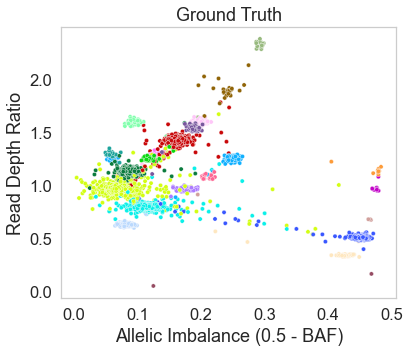

In [20]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
plt.gca().grid(False)
sns.scatterplot(data=df_truth[df_truth["SAMPLE"]=="bulk_035clone1_06clone0_005normal"], x="mBAF", y="RD", hue="CLUSTER", palette=true_colordict, size=0.7, legend=False)
plt.gca().set_xlabel("Allelic Imbalance (0.5 - BAF)")
plt.gca().set_ylabel("Read Depth Ratio")
plt.gca().set_title("Ground Truth")
plt.gcf().set_size_inches((6,5))
plt.savefig("/Users/gillianchu/mek/cnaviz/simulations/scripts/sim_plot/scatterplots/s4669_true.svg", dpi=300)


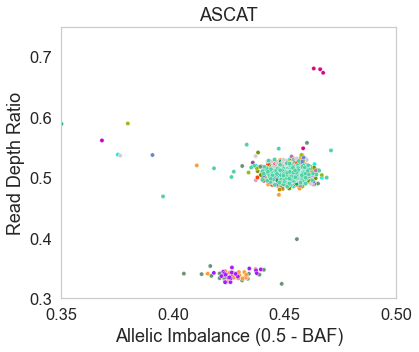

In [21]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
plt.gca().grid(False)
df_pre = pd.read_csv(prefile, sep="\t")
df_pre["mBAF"] = 0.5 - df_pre["BAF"]

sns.scatterplot(data=df_pre[df_pre["SAMPLE"]=="bulk_035clone1_06clone0_005normal"], x="mBAF", y="RD", hue="CLUSTER", palette=inferred_colordict, size=0.7, legend=False)

plt.gca().set_xlim((0.35, 0.5))
plt.gca().set_ylim((0.3, 0.75))
plt.gca().set_xlabel("Allelic Imbalance (0.5 - BAF)")
plt.gca().set_ylabel("Read Depth Ratio")
plt.gca().set_title("ASCAT")
plt.gcf().set_size_inches((6,5))

plt.savefig("/Users/gillianchu/mek/cnaviz/simulations/scripts/sim_plot/scatterplots/s4669_ascat_merge1.svg", bbox_inches='tight', dpi=300)

In [22]:
def read_file(f):
    with open(f, "r") as r:
        lines = r.readlines()
        return [line.strip().split('\t') for line in lines]

In [23]:
s1_truth = "/Users/gillianchu/mek/cnaviz/ascat/analysis/k4_01090_02008_00506035_00504055_truth.clusters.bulk_08clone1_Noneclone0_02normal.txt"
s2_truth = "/Users/gillianchu/mek/cnaviz/ascat/analysis/k4_01090_02008_00506035_00504055_truth.clusters.bulk_035clone1_06clone0_005normal.txt"
s3_truth = "/Users/gillianchu/mek/cnaviz/ascat/analysis/k4_01090_02008_00506035_00504055_truth.clusters.bulk_055clone1_04clone0_005normal.txt"

s1_post = "/Users/gillianchu/mek/cnaviz/ascat/analysis/post.clusters.bulk_08clone1_Noneclone0_02normal.txt"
s2_post = "/Users/gillianchu/mek/cnaviz/ascat/analysis/post.clusters.bulk_035clone1_06clone0_005normal.txt"
s3_post = "/Users/gillianchu/mek/cnaviz/ascat/analysis/post.clusters.bulk_055clone1_04clone0_005normal.txt"


s1_pre = "/Users/gillianchu/mek/cnaviz/ascat/analysis/pre.clusters.bulk_08clone1_Noneclone0_02normal.txt"
s2_pre = "/Users/gillianchu/mek/cnaviz/ascat/analysis/pre.clusters.bulk_035clone1_06clone0_005normal.txt"
s3_pre = "/Users/gillianchu/mek/cnaviz/ascat/analysis/pre.clusters.bulk_055clone1_04clone0_005normal.txt"

s1_true_lines = read_file(s1_truth)
s2_true_lines = read_file(s2_truth)
s3_true_lines = read_file(s3_truth)

s1_post_lines = read_file(s1_post)
s2_post_lines = read_file(s2_post)
s3_post_lines = read_file(s3_post)

s1_pre_lines = read_file(s1_pre)
s2_pre_lines = read_file(s2_pre)
s3_pre_lines = read_file(s3_pre)


In [24]:
true_lines = read_file(truthfile)
post_lines = read_file(postfile)
pre_lines = read_file(prefile)

def find_diff_idxs(pre_lines, post_lines):
    idxs = []

    for i in range(len(pre_lines)):
        c1 = pre_lines[i]
        c2 = post_lines[i]
        if c1 != c2:
            idxs.append(i)
    return idxs

d = find_diff_idxs(s1_pre_lines, s1_post_lines)

rd, baf, clusters = [], [], []
rd_focus, baf_focus, clusters_focus = [], [], []

sample_idx = [i for i in range(len(post_lines[0])) if true_lines[0][i] == 'SAMPLE'][0]
rd_idx, baf_idx, cluster_idx = [i for i in range(len(true_lines[0])) if true_lines[0][i] == 'RD'][0], [i for i in range(len(true_lines[0])) if true_lines[0][i] == 'BAF'][0], -1

sample_i = 0 
for i, line in enumerate(post_lines[1:]):
    if line[sample_idx] == 'bulk_035clone1_06clone0_005normal':
        if sample_i in set(d):
            rd_focus.append(float(line[rd_idx]))
            baf_focus.append(0.5 - float(line[baf_idx]))
            # clusters_focus.append(int(line[cluster_idx]))
            clusters_focus.append(sample_i)
        else:  
            rd.append(float(line[rd_idx]))
            baf.append(0.5 - float(line[baf_idx]))
            # clusters.append(int(line[cluster_idx]))
            clusters.append(sample_i)

        sample_i += 1

In [25]:

df_post = pd.read_csv(postfile, sep="\t")
df_post["mBAF"] = 0.5 - df_post["BAF"]

df_post_proc = df_post[df_post["SAMPLE"]=="bulk_035clone1_06clone0_005normal"]

In [26]:
clusters

[129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295

In [27]:
clusters_other = df_post_proc.iloc[clusters]
clusters_focus = df_post_proc.iloc[clusters_focus]

In [28]:
gray_dict = dict()
for key in edited_colordict:
    gray_dict[key] = "lightgray"

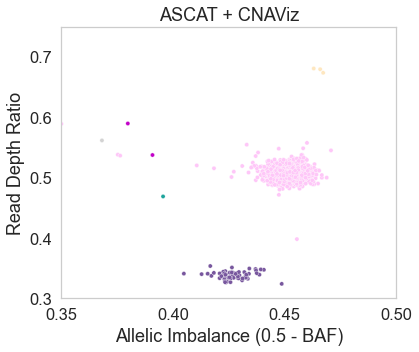

In [29]:
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
plt.gca().grid(False)

sns.scatterplot(data=clusters_other, x="mBAF", y="RD", hue="CLUSTER", palette=gray_dict, size=0.7, legend=False)
sns.scatterplot(data=clusters_focus, x="mBAF", y="RD", hue="CLUSTER", palette=edited_colordict, size=0.7, legend=False)

plt.gca().set_xlim((0.35, 0.5))
plt.gca().set_ylim((0.3, 0.75))
plt.gca().set_xlabel("Allelic Imbalance (0.5 - BAF)")
plt.gca().set_ylabel("Read Depth Ratio")
plt.gca().set_title("ASCAT + CNAViz")
plt.gcf().set_size_inches((6,5))

plt.savefig("/Users/gillianchu/mek/cnaviz/simulations/scripts/sim_plot/scatterplots/s4669_ascat_cnaviz_merge1.svg", bbox_inches='tight', dpi=300)